ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **03Feb23**

# 04. Array Operations
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\vvec}{\boldsymbol{\mathsf{v}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Formatting Output](#format)
   + `Numpy` `set_printoptions()` method
* [Vectors](#vectors)
   + [Element-by-element addition/subtraction](#vecaddsub)
   + [Element-by-element product/division](#vecproddiv)
   + [Self product](#vecselfprod)
   + [Inner product (dot product)](#vecinnerprod)
   + [Scaling (element-by-element multiplication/division by scalar)](#vecscale)
   + [Element-by-element mathematical operations](#vecops)
   + [Element-by-element search](#vecsearch)
   + [Zip vectors](#veczip)
* [Matrices](#matrices)
   + [Element-by-element addition/subtraction](#mataddsub)
   + [Element-by-element product/division](#matproddiv)
   + [Scaling (element-by-element multiplication/division by scalar)](#matscale)
   + [Element-by-element mathematical operations](#matops)
   + [Transposition](#mattransp)
     - `Numpy` `set_printoptions()` method
   + [Element-by-element search](#matsearch)
---

## [Objectives](#toc)<a id="obj"></a>

 + Cover basic array operations in 1-D (vectors) and 2-D (matrices) needed throughout the course.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

## [Formatting Output](#toc)<a id="format"></a>

* Scientific notation

In [2]:
import math

pi = math.pi

print('pi = %15.5e'%pi) # formatting numeric output: scientific notation

pi =     3.14159e+00


In [3]:
print('pi = %10.5f'%pi) # formatting numeric output: float

pi =    3.14159


In [4]:
print('pi = %10.5e and e = %8.3f'%(pi, math.e)) # formatting numeric output: sci. notation and float

pi = 3.14159e+00 and e =    2.718


* `Numpy` arrays

In [5]:
'''Use set print options in Numpy'''

np.set_printoptions(precision=4, threshold=800, edgeitems=6, linewidth=105)

mtrx = np.random.random((10,100))

print(mtrx)

[[0.2453 0.3414 0.5415 0.9324 0.6208 0.8084 ... 0.5129 0.1208 0.8433 0.999  0.2833 0.4781]
 [0.2235 0.0051 0.3223 0.3275 0.9567 0.6091 ... 0.2811 0.1659 0.0074 0.5461 0.0056 0.8236]
 [0.5545 0.129  0.6904 0.1319 0.6212 0.1519 ... 0.4746 0.5462 0.9351 0.121  0.3353 0.7557]
 [0.79   0.5895 0.8706 0.7926 0.7169 0.9279 ... 0.8025 0.8529 0.4134 0.9521 0.6577 0.6653]
 [0.9397 0.8899 0.7619 0.6279 0.8156 0.4123 ... 0.5485 0.8158 0.5045 0.9706 0.0683 0.9763]
 [0.1668 0.1838 0.4771 0.6017 0.2225 0.055  ... 0.3335 0.5083 0.3121 0.4804 0.1834 0.6906]
 [0.156  0.635  0.0347 0.5683 0.9944 0.564  ... 0.7254 0.5975 0.5356 0.511  0.9941 0.2447]
 [0.9304 0.814  0.0258 0.238  0.4057 0.6475 ... 0.3265 0.1825 0.0414 0.0561 0.5408 0.2743]
 [0.7037 0.7665 0.376  0.688  0.8369 0.8778 ... 0.279  0.0259 0.0386 0.2148 0.6677 0.4469]
 [0.7276 0.9349 0.4214 0.2899 0.5867 0.9024 ... 0.8371 0.1557 0.4477 0.1822 0.1564 0.8861]]


In [ ]:
#help(np.set_printoptions)

## [Vectors](#toc)<a id="vectors"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [6]:
'''Set double precision at creation time'''

x_vec = np.empty(10, dtype=np.float64)

print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [7]:
'''Set double precision after creation'''

x_vec = x_vec.astype(float)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [8]:
'''Set single precision after creation; not to be used'''

x_vec = x_vec.astype(np.float32)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float32


#### [Element-by-element addition/subtraction](#toc)<a id="vecaddsub"></a>

In [9]:
'''Element-by-element addition or subtraction'''

vec1 = np.array(np.random.random(5))
print('vec1     =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2     =',vec2)

result = vec1 + vec2         # element-by-element sum
print('addition   =',result)

result = vec1 - vec2         # element-by-element subtraction
print('difference =',result)

vec1     = [0.3061 0.9726 0.47   0.6352 0.1211]
vec2     = [0.1643 0.3742 0.4219 0.7073 0.6961]
addition   = [0.4705 1.3469 0.8919 1.3425 0.8173]
difference = [ 0.1418  0.5984  0.0482 -0.0721 -0.575 ]


#### [Element-by-element product/division](#toc)<a id="vecproddiv"></a>

In [10]:
'''Element-by-element product or division'''

vec1 = np.array(np.random.random(5))
print('vec1    =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2    =',vec2)

result = vec1 * vec2        # element-by-element product
print('product  =',result)

result = vec1 / vec2        # element-by-element division
print('division =',result)

vec1    = [0.4264 0.2574 0.2604 0.5165 0.964 ]
vec2    = [0.3391 0.9273 0.9503 0.4888 0.6369]
product  = [0.1446 0.2387 0.2475 0.2525 0.614 ]
division = [1.2571 0.2776 0.274  1.0568 1.5136]


#### [Self product](#toc)<a id="vecselfprod"></a>

In [11]:
'''Product of all elements of a vector'''

vec1_prod = np.prod(vec1)

print('vec1         =', vec1)
print('vec1 product =', vec1_prod)

vec1         = [0.4264 0.2574 0.2604 0.5165 0.964 ]
vec1 product = 0.014230652102413434


#### [Inner product (dot product)](#toc)<a id="vecinnerprod"></a>

The result of the inner product of two vectors: $\vvec_1 \cdot \vvec_2$ is a scalar.

In [12]:
'''Vector inner product or dot product'''

vec1 = np.array(np.random.random(5))
print('vec1           =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2           =',vec2)

result = np.dot(vec1, vec2)     # inner or dot product
print('dot product =',result)

vec1           = [0.1352 0.0454 0.2767 0.5583 0.1134]
vec2           = [0.315  0.1592 0.3558 0.9896 0.9032]
dot product = 0.8032134745778778


In [13]:
'''More on vector inner product or dot product'''
'''Another way to compute the inner product'''

ele_by_ele_product = vec1 * vec2

inner_product = ele_by_ele_product.sum()

print('vec1 . vec2 = ', inner_product)

vec1 . vec2 =  0.803213474577878


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="vecscale"></a>

In [14]:
'''Scaling of a vector'''

vec = np.array(np.random.random(5))
print('vec    =',vec)

factor = 0.345
scaled = factor * vec     # scaling of vec element-by-element product
print('scaled =', scaled) # assigned to new variable `scaled`

vec *= factor          # in-place scaling
print('vec    =',vec)

vec    = [4.1518e-01 2.3967e-01 3.5003e-01 6.0625e-01 2.8577e-04]
scaled = [1.4324e-01 8.2686e-02 1.2076e-01 2.0916e-01 9.8591e-05]
vec    = [1.4324e-01 8.2686e-02 1.2076e-01 2.0916e-01 9.8591e-05]


#### [Element-by-element mathematical operations](#toc)<a id="vecops"></a>

In [15]:
'''Mathematical Operations on a Vector'''

vec = np.array(np.random.random(5))
print('vec      =',vec)

log_vec = np.log(vec)         # natural log element-by-element
print('log(vec) =',log_vec)

exp_vec = np.exp(log_vec)     # exponential
print('exp(vec) =',exp_vec)

sin_vec = np.sin(vec)         # sine
print('sin(vec) =',sin_vec)

vec_cubed = vec**3            # powers
print('vec^3    =',vec_cubed)

vec_mean = vec.mean()         # arithmetic mean
print('mean(vec) =',vec_mean)

vec_std = vec.std()           # standard deviation
print('std(vec) =',vec_std)

vec      = [0.0598 0.6306 0.7108 0.4937 0.3172]
log(vec) = [-2.8172 -0.4611 -0.3414 -0.7058 -1.1482]
exp(vec) = [0.0598 0.6306 0.7108 0.4937 0.3172]
sin(vec) = [0.0597 0.5896 0.6524 0.4739 0.3119]
vec^3    = [2.1356e-04 2.5072e-01 3.5909e-01 1.2033e-01 3.1918e-02]
mean(vec) = 0.4424047737009045
std(vec) = 0.23329833881112422


#### [Element-by-element search](#toc)<a id="vecsearch"></a>

In [16]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] >= 0.3
(idx_ids, ) = np.where(vec >= 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.0598 0.6306 0.7108 0.4937 0.3172]
indices =  [1 2 3 4]


In [17]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] == 0.3
(idx_ids, ) = np.where(vec == 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.0598 0.6306 0.7108 0.4937 0.3172]
indices =  []


#### [Zip vectors](#toc)<a id="veczip"></a>

In [18]:
'''Zip creates a list of tuples on the fly'''

print(list(zip(vec1, vec2)))

[(0.13523148931585416, 0.31503496144057463), (0.04540100216395071, 0.15916980843193762), (0.2767272644050277, 0.3558111607808927), (0.5583093874683697, 0.9895818461079954), (0.113410932367492, 0.9031657978853294)]


## [Matrices](#toc)<a id="matrices"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [19]:
'''Set double precision at creation time'''

mtrx = np.empty((5,5), dtype=np.float64)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


In [20]:
'''Set double precision after creation'''

mtrx = mtrx.astype(float)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


#### [Element-by-element addition/subtraction](#toc)<a id="mataddsub"></a>

In [21]:
'''Element-by-element addition or subtraction'''

mat1 = np.random.random((3,3))
print('mat1       =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2       =\n', mat2)

result = mat1 + mat2              # element-by-element sum
print('addition   =\n', result)

result = mat1 - mat2              # element-by-element subtraction
print('difference =\n', result)

mat1       =
 [[0.3121 0.1424 0.2083]
 [0.2012 0.4612 0.6685]
 [0.4662 0.9419 0.8978]]
mat2       =
 [[0.743  0.2407 0.812 ]
 [0.1727 0.9574 0.576 ]
 [0.8856 0.6955 0.9111]]
addition   =
 [[1.0552 0.383  1.0203]
 [0.3739 1.4186 1.2445]
 [1.3518 1.6374 1.8089]]
difference =
 [[-0.4309 -0.0983 -0.6037]
 [ 0.0285 -0.4961  0.0925]
 [-0.4193  0.2464 -0.0133]]


#### [Element-by-element product/division](#toc)<a id="matproddiv"></a>

In [22]:
'''Element-by-element product or division'''

mat1 = np.random.random((3,3))
print('mat1     =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2     =\n', mat2)

result = mat1 * mat2          # element-by-element product
print('product  =\n', result)

result = mat1 / mat2          # element-by-element division (cross your fingers)
print('division =\n', result)

mat1     =
 [[0.6476 0.848  0.5323]
 [0.8338 0.2572 0.6754]
 [0.7301 0.2343 0.2267]]
mat2     =
 [[0.0865 0.4297 0.6014]
 [0.9834 0.8575 0.7344]
 [0.821  0.3185 0.7479]]
product  =
 [[0.056  0.3644 0.3201]
 [0.82   0.2206 0.496 ]
 [0.5994 0.0746 0.1695]]
division =
 [[7.484  1.9734 0.8851]
 [0.8479 0.3    0.9197]
 [0.8893 0.7356 0.3031]]


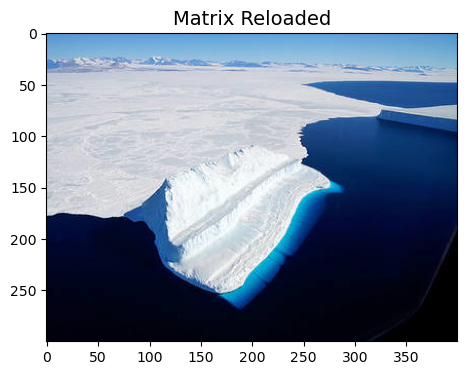

block shape = (300, 400, 3)


In [23]:
'''Produce Noise on a Matrix Image (brick data)'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

# Read image from the images/ directory in the chen-3170 repo
block = plt.imread('images/glacier.png', format='png')

plt.figure(1)
plt.imshow(block)
plt.title('Matrix Reloaded', fontsize=14)
plt.show()
print('block shape =', block.shape)  # inspect the array shape

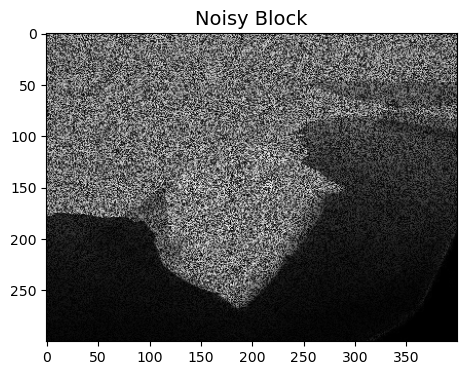

In [24]:
'''Use Matrix Element-by-Element Multiplication'''

mtrx_shape = block.shape[0:2]                 # use the shape to automate noise_mtrx generation

noise_mtrx = np.random.random(mtrx_shape)   # generate random matrix

block_noise = block[:,:,2] * noise_mtrx   # apply noise to the blue channel

plt.figure(2)
plt.imshow(block_noise, cmap='gray')
plt.title('Noisy Block',fontsize=14)
plt.show()

In [ ]:
'''Matrix Scaling (matrix product or division by a scalar)'''

mat1 = np.random.random((3,3))
print('mat1      =\n',mat1)

factor = 3.21
result = factor * mat1        # scaling of mat1 element-by-element; product with factor
print('scaled   =\n',result)

#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="matscale"></a>

In [ ]:
'''Matrix Scaling of an Image'''

color_channel = np.copy(block[:,:,0])   # copy the red channel

color_channel /= color_channel.max()    # scale to gray, 0-255 values
color_channel *= 255
gray_channel  = color_channel.astype(int) # truncate all float data type to int

plt.figure(3)
plt.imshow(gray_channel, cmap='gray')
#plt.imshow(gray_channel)

plt.title('Matrix Gray Scaling',fontsize=14)
plt.show()

#### [Element-by-element mathematical operations](#toc)<a id="matops"></a>

In [ ]:
'''Other Mathematical Operations on a Matrix'''

mtrx = np.copy(block[:,:,0])    # copy the red channel

plt.figure(4)
plt.imshow(mtrx, cmap='gray')              # show channel as a flat image with default colormap
plt.title('Original', fontsize=14)
plt.show()

mtrx_mean = mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

In [ ]:
'''Other Mathematical Operations on a Matrix'''

log_mtrx = np.log(mtrx + .001)  # natural log element-by-element

plt.figure(5)
plt.imshow(log_mtrx, cmap='gray')
plt.title('Log Transform', fontsize=14)
plt.show()

mtrx_mean = log_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = log_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

In [ ]:
'''Other Mathematical Operations on a Matrix'''

exp_mtrx = np.exp(log_mtrx)     # exponential

plt.figure(6)
plt.imshow(exp_mtrx)
plt.title('Exp of Log Transform', fontsize=14)
plt.show()

mtrx_mean = exp_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = exp_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

In [ ]:
'''Other Mathematical Operations on a Matrix'''

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

plt.figure(7)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_mean = sin_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = sin_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

In [ ]:
'''Other Mathematical Operations on a Matrix'''

mtrx_cubed = mtrx**3  # powers

plt.figure(8)
plt.imshow(mtrx_cubed, cmap='gray')
plt.title('Cube Transform', fontsize=14)
plt.show()

mtrx_mean = mtrx_cubed.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx_cubed.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

#### [Transposition](#toc)<a id="mattransp"></a>

In [ ]:
'''Matrix Transposition'''
'''clockwise rotation followed by horizontal right to left flip'''

mtrx = np.random.random((5,7))

np.set_printoptions(precision=3,threshold=20,edgeitems=12,linewidth=100) # one way to control printing of numpy arrays

print('mtrx =\n',mtrx)

mtrx_T = mtrx.transpose()       # transpose of a mtrx: M[i,j] -> M[j,i]

print('mtrx^T =\n',mtrx_T)

In [ ]:
'''Matrix Transposition'''
'''Example of adding a transformed matrix to another transform transposed'''

'''note: to add a matrix to its transpose, a matrix must be square'''

n_rows = block.shape[0]
n_columns = n_rows

mtrx = np.copy(block[:n_rows,:n_columns,0])   # select a square block; red channel

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

sin_mtrx /= sin_mtrx.max()
plt.figure(9)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_cubed = mtrx**3                # powers

plt.figure(10)
plt.imshow(mtrx_cubed)
plt.title('Cube Transform', fontsize=14)
plt.show()

plt.figure(11)
plt.imshow(sin_mtrx + mtrx_cubed.transpose())    # sine + cubed transposed
plt.title('Sine + Cube Transpose Transform', fontsize=14)
plt.show()

#### [Element-by-element search](#toc)<a id="matsearch"></a>

In [ ]:
'''Searching a matrix for entries matching a test'''

# what are the indices of the values in "mtrx" that satisfy: mtrx >= 0.3
(idx_ids, jdx_ids) = np.where(mtrx >= 0.3) 

np.set_printoptions(precision=3, threshold=20, edgeitems=5, linewidth=100) 

print('matrix =\n', mtrx)
print('ith indices = ',idx_ids)
print('jth indices = ',jdx_ids)

In [ ]:
'''Verify the searched elements'''

mtrx[idx_ids, jdx_ids].min()

In [ ]:
mtrx[idx_ids, jdx_ids].shape

In [ ]:
mtrx[idx_ids, jdx_ids].dtype